In [1]:
import nltk
import glob
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
FOLDER_MINUTES_LEMMATIZED = "./data/processed/copom_minutes_lemmatized"

In [3]:
all_minutes_str = ""
all_minutes_list = []
paragraphs_size = []

filepaths = glob.glob(f"{FOLDER_MINUTES_LEMMATIZED}/*.txt")
filepaths.sort()

for path in filepaths:
    filename = os.path.basename(path)
        
    with open(path, 'r', encoding='utf-8') as f:
        minute = f.read()
        all_minutes_str += minute
        
        paragraphs = [p for p in minute.split('\n') if p.strip()]
        all_minutes_list.append(paragraphs)
        
        for paragrafo in paragraphs: 
            palavras = [w for w in paragrafo.split(' ')]
            paragraphs_size.append(len(palavras))


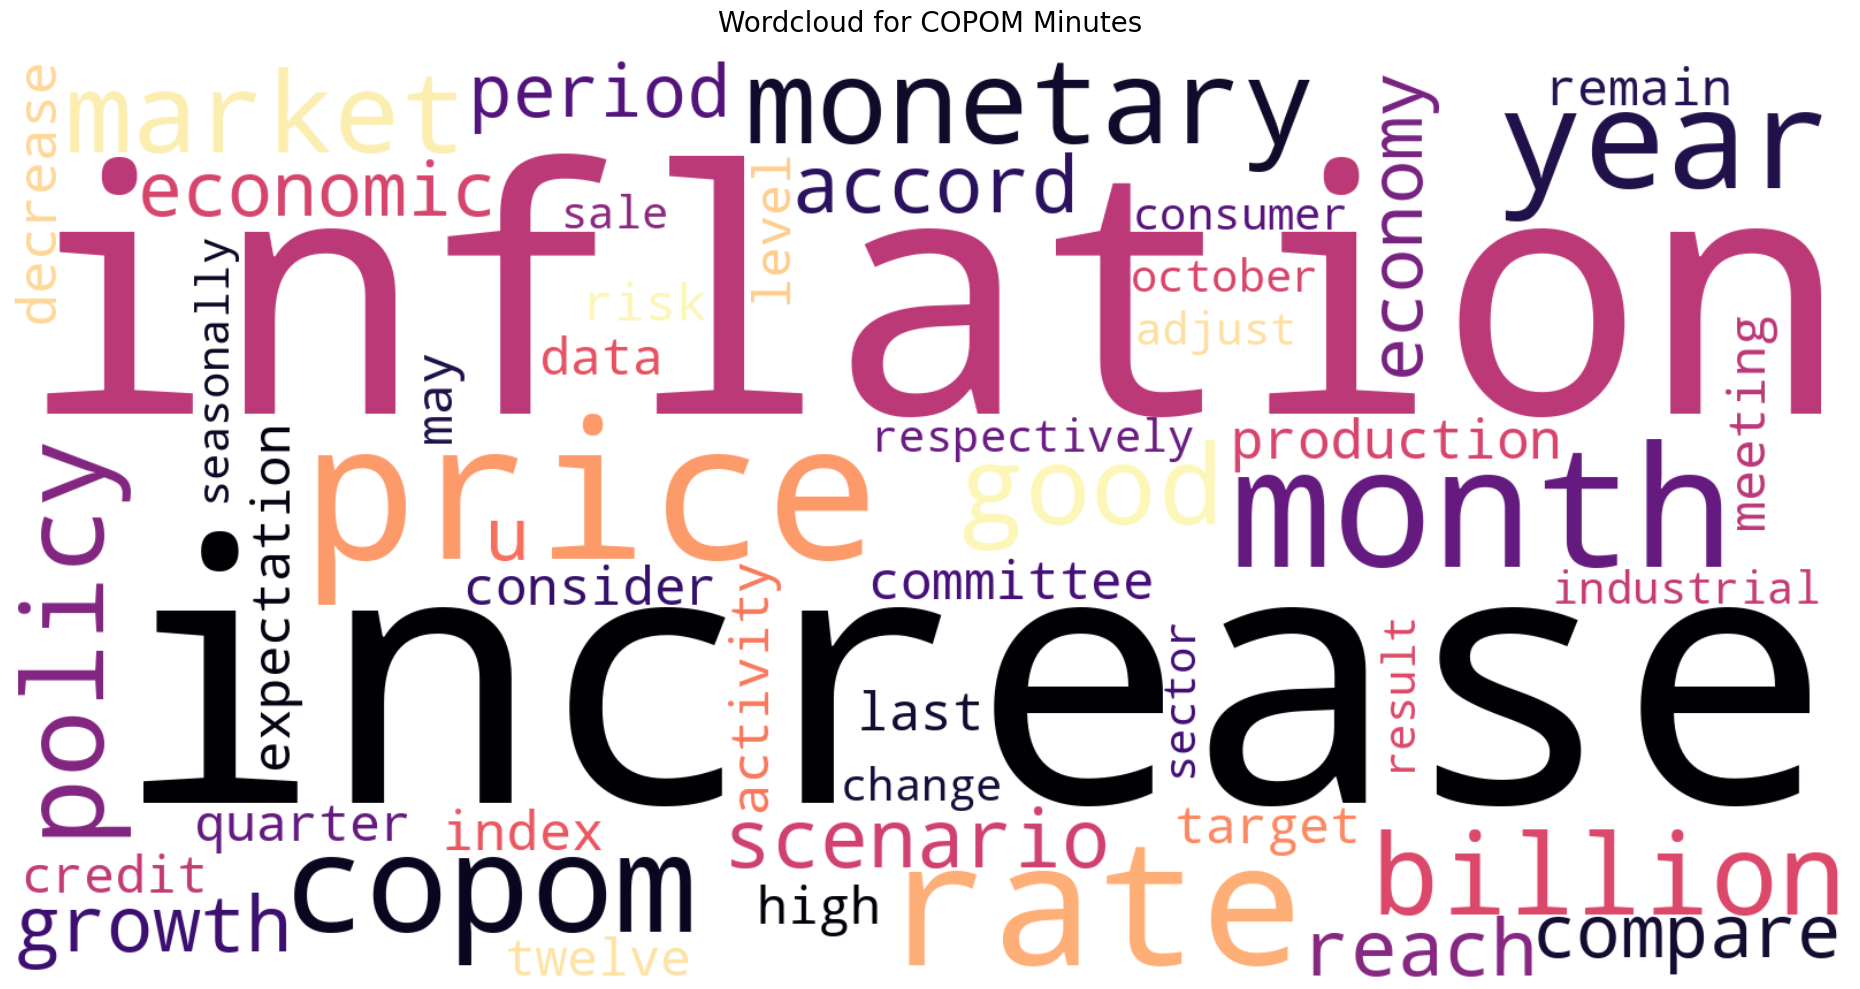

In [4]:
wordcloud = WordCloud(
    background_color="white",
    width=1600,
    height=800,
    max_words=50,
    colormap='magma',
    collocations=False
).generate(all_minutes_str)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for COPOM Minutes', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

plt.close()

C:\Users\MatheusBreitenbach\AppData\Local\Temp\ipykernel_4960\1009384802.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


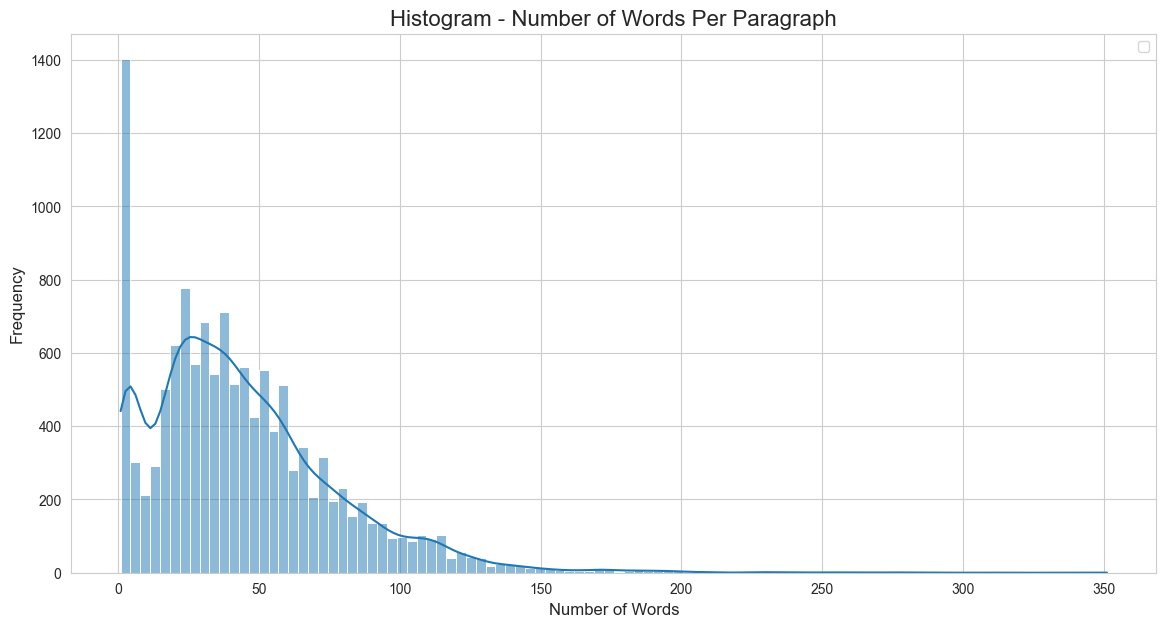

In [5]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.histplot(data=paragraphs_size, bins=100, kde=True)

plt.title('Histogram - Number of Words Per Paragraph', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

C:\Users\MatheusBreitenbach\AppData\Local\Temp\ipykernel_4960\2581050201.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


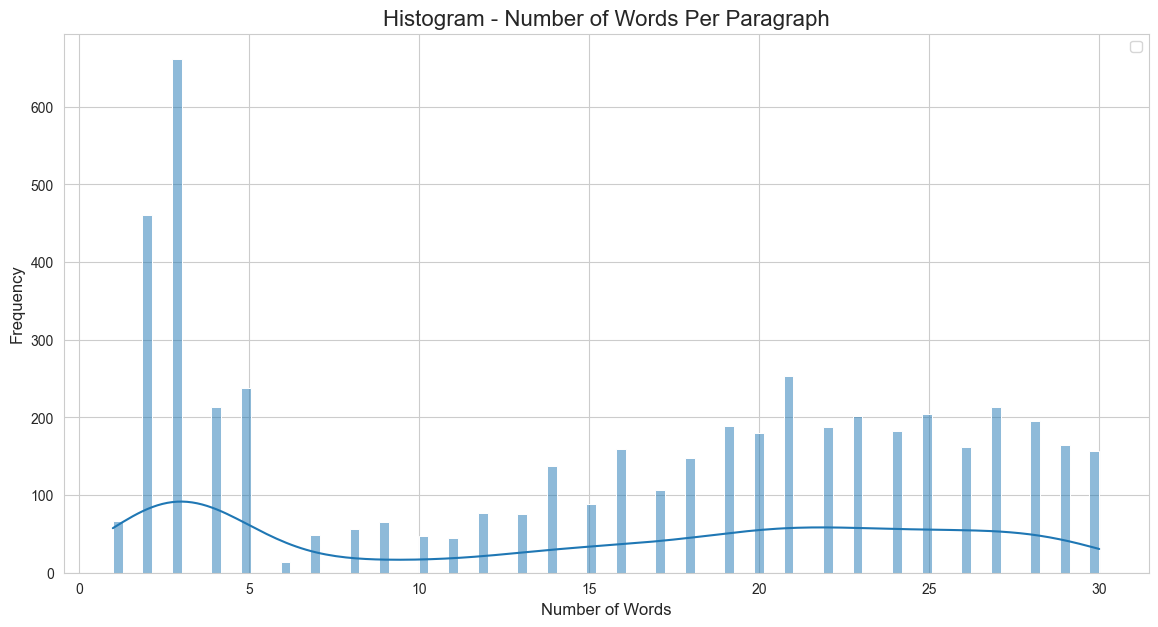

In [6]:
# Which paragraph size to ignore? It seams to be the ones smaller than 6 words.

n_words_max = 30
paragraphs_size_less15 = [p_size for p_size in paragraphs_size if p_size <= n_words_max]
bins = np.arange(0, n_words_max+1) - 0.5

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.histplot(data=paragraphs_size_less15, bins=100, kde=True)

plt.title('Histogram - Number of Words Per Paragraph', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()